In [ ]:
!gdown 1IYejDqV6BMmm8D05CDN7-9vZpQK1FL7n

Downloading...
From: https://drive.google.com/uc?id=1IYejDqV6BMmm8D05CDN7-9vZpQK1FL7n
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 17.5MB/s]


In [ ]:
import pandas as pd

file_path = '/content/drug200.csv'
data = pd.read_csv(file_path)

data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Separate features and target (assuming 'Drug' is the target column)
target_column = 'Drug'
if target_column in categorical_features:
    categorical_features.remove(target_column)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(data[target_column])

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

# Extract features
X = data.drop(columns=[target_column])
X = preprocessor.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 9), (40, 9), (160,), (40,))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:


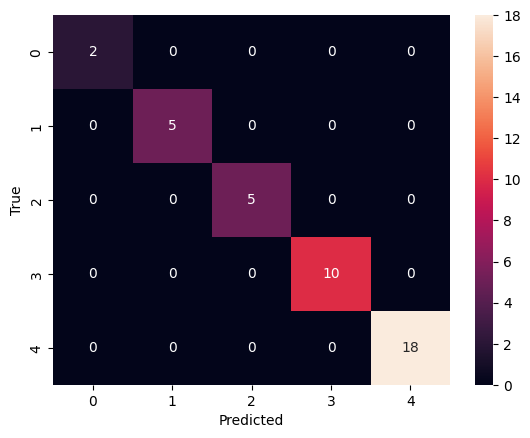

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=14)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

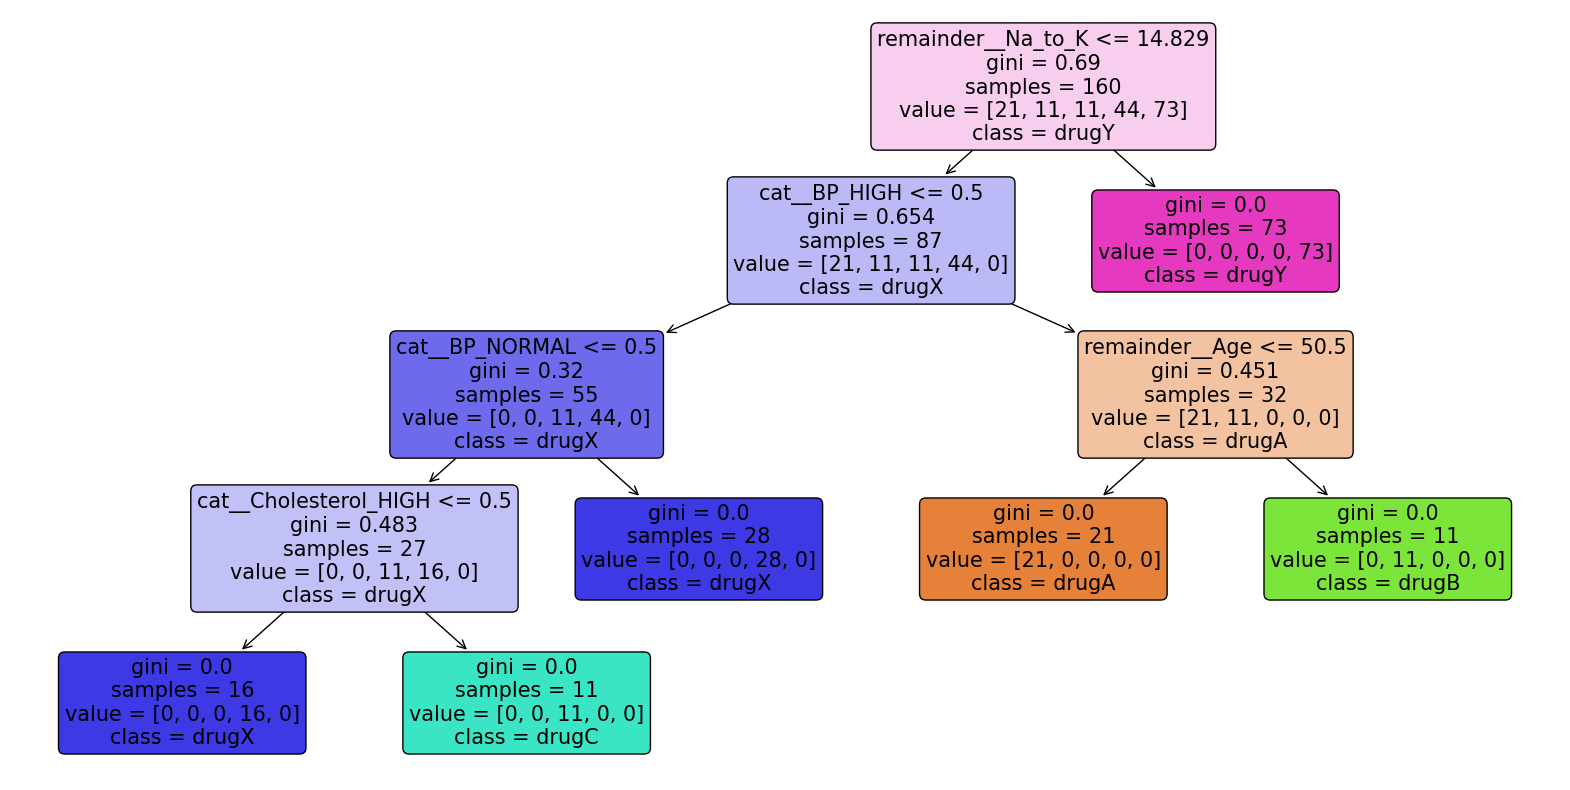

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=le.classes_, rounded=True)
plt.show()

In [ ]:
# Investigate the effect of max_depth
depths = [5, 10, 15, 20, 25]
depth_results = {}

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=14)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    depth_results[depth] = accuracy_score(y_test, y_pred)

print('Depth Results:', depth_results)

# Investigate the effect of min_samples_split
splits = [2, 10, 20, 50, 100]
split_results = {}

for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=14)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    split_results[split] = accuracy_score(y_test, y_pred)

print('Split Results:', split_results)


Depth Results: {5: 1.0, 10: 1.0, 15: 1.0, 20: 1.0, 25: 1.0}
Split Results: {2: 1.0, 10: 1.0, 20: 1.0, 50: 0.75, 100: 0.7}


# RF

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Random Forest Confusion Matrix:


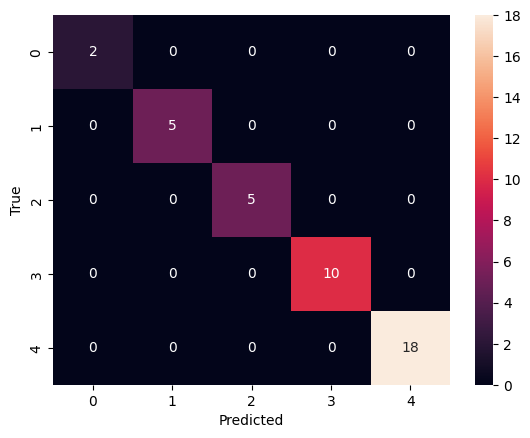

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=100, random_state=14)
rf_clf.fit(X_train, y_train)

y_rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_report = classification_report(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)

print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Classification Report:')
print(rf_report)
print('Random Forest Confusion Matrix:')
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(rf_conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## GridSearchCV on D.T.

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:


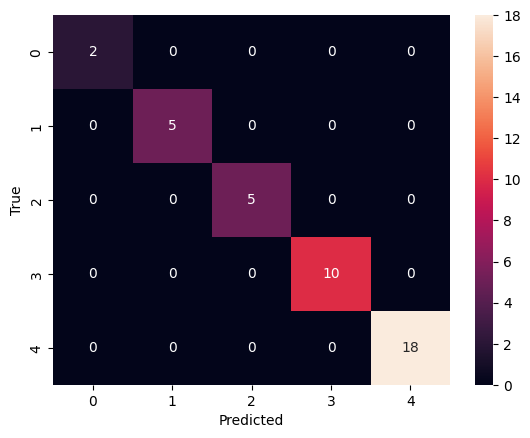

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=14)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()